# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Data Analysis

#One
# The closer one gets to the equator the hotter it gets. See Latitude and Temperature.

#Two
# Near the equator the humidity always seems to be greater than 40%.

#Three
# There is not a strong correlation between latitude and wind speed and cloudiness.

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from datetime import date
date.today()

datetime.date(2020, 6, 9)

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#URL for Open Weather API Requests
url = "http://api.openweathermap.org/data/2.5/weather?"

Humidity = []
Temperature = []
Cloudiness = []
WindSpeed = []
Latitude = []
Longitude = []
cities_2 = []
a = 0

# Build query URL

for x in cities:

    a = a + 1
    query_url = url + "appid=" + weather_api_key + "&q=" + x
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    if weather_json["cod"] != "404":      
        Humidity.append(weather_json["main"]["humidity"])
        preround = ((weather_json["main"]["temp"]) - 273.15)*(9/5)+32
        preround = round(preround,2)
        Temperature.append(preround)
        Latitude.append(weather_json["coord"]["lat"])
        Longitude.append(weather_json["coord"]["lon"])
        Cloudiness.append(weather_json["clouds"]["all"])
        WindSpeed.append(weather_json["wind"]["speed"])
        cities_2.append(x)
        print(f"Processing Record {a} of {len(cities)} | {x} ")

    if weather_json["cod"] == "404":
        print("City not found. Skipping...")

print("Data Retrieval Comoplete")

City not found. Skipping...
Processing Record 2 of 595 | khatanga 
Processing Record 3 of 595 | cape town 
Processing Record 4 of 595 | fortuna 
Processing Record 5 of 595 | tomatlan 
Processing Record 6 of 595 | provideniya 
Processing Record 7 of 595 | nizhniy tsasuchey 
Processing Record 8 of 595 | punta arenas 
Processing Record 9 of 595 | coos bay 
Processing Record 10 of 595 | zavetnoye 
Processing Record 11 of 595 | valle de allende 
Processing Record 12 of 595 | hay river 
Processing Record 13 of 595 | komsomolskiy 
Processing Record 14 of 595 | constitucion 
Processing Record 15 of 595 | qaanaaq 
Processing Record 16 of 595 | yellowknife 
Processing Record 17 of 595 | qinzhou 
Processing Record 18 of 595 | avarua 
Processing Record 19 of 595 | port elizabeth 
Processing Record 20 of 595 | albany 
Processing Record 21 of 595 | morant bay 
Processing Record 22 of 595 | flers 
Processing Record 23 of 595 | acapulco 
Processing Record 24 of 595 | tayu 
Processing Record 25 of 595 

Processing Record 206 of 595 | ambanja 
Processing Record 207 of 595 | cabot 
Processing Record 208 of 595 | itoman 
Processing Record 209 of 595 | tuzha 
Processing Record 210 of 595 | farah 
Processing Record 211 of 595 | nanortalik 
Processing Record 212 of 595 | arraial do cabo 
Processing Record 213 of 595 | nizhneangarsk 
Processing Record 214 of 595 | mayo 
Processing Record 215 of 595 | santiago del estero 
Processing Record 216 of 595 | puksoozero 
Processing Record 217 of 595 | roebourne 
Processing Record 218 of 595 | praya 
Processing Record 219 of 595 | portales 
Processing Record 220 of 595 | xinzhou 
Processing Record 221 of 595 | santa isabel do rio negro 
Processing Record 222 of 595 | touros 
Processing Record 223 of 595 | margate 
Processing Record 224 of 595 | sambava 
Processing Record 225 of 595 | charlestown 
City not found. Skipping...
Processing Record 227 of 595 | viransehir 
Processing Record 228 of 595 | libertador general san martin 
Processing Record 229 o

Processing Record 407 of 595 | tual 
Processing Record 408 of 595 | belaya gora 
Processing Record 409 of 595 | port hardy 
Processing Record 410 of 595 | sawtell 
Processing Record 411 of 595 | icod de los vinos 
Processing Record 412 of 595 | tahe 
Processing Record 413 of 595 | kirakira 
Processing Record 414 of 595 | ledyard 
Processing Record 415 of 595 | tromso 
Processing Record 416 of 595 | furukawa 
Processing Record 417 of 595 | concepcion del oro 
Processing Record 418 of 595 | krasnoturansk 
Processing Record 419 of 595 | goma 
City not found. Skipping...
Processing Record 421 of 595 | san jeronimo 
Processing Record 422 of 595 | vao 
Processing Record 423 of 595 | korla 
Processing Record 424 of 595 | lokoja 
Processing Record 425 of 595 | fethiye 
Processing Record 426 of 595 | marsh harbour 
Processing Record 427 of 595 | ranong 
Processing Record 428 of 595 | sur 
Processing Record 429 of 595 | camana 
Processing Record 430 of 595 | fort nelson 
Processing Record 431 of

In [7]:
Weather_df = pd.DataFrame({"City": cities_2, "Latitude" : Latitude, "Longitude": Longitude, 
                           "Temperature": Temperature, "Humidity": Humidity, "Cloudiness": Cloudiness,
                          "Wind Speed": WindSpeed})

Weather_df.head()    


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,khatanga,71.97,102.50,59.63,31,9,5.58
1,cape town,-33.93,18.42,57.25,87,75,11.30
2,fortuna,40.60,-124.16,59.50,100,1,4.10
3,tomatlan,19.93,-105.25,74.95,84,60,1.24
4,provideniya,64.38,-173.30,50.00,71,0,3.00


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
Weather_df.to_csv("City_Data_1.csv")
len(Weather_df)

542

In [9]:
Weather_df.loc[Weather_df["Humidity"] <= 100]


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,khatanga,71.97,102.50,59.63,31,9,5.58
1,cape town,-33.93,18.42,57.25,87,75,11.30
2,fortuna,40.60,-124.16,59.50,100,1,4.10
3,tomatlan,19.93,-105.25,74.95,84,60,1.24
4,provideniya,64.38,-173.30,50.00,71,0,3.00
...,...,...,...,...,...,...,...
537,youghal,51.95,-7.85,54.23,93,75,2.60
538,jackson,42.42,-122.83,72.54,41,20,3.60
539,yumen,40.28,97.20,80.04,13,100,7.56
540,hasaki,35.73,140.83,88.32,48,20,7.20


In [10]:
len(Weather_df.loc[Weather_df["Humidity"] > 100])


0

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#Dealt above with loc function, checked in the box directly below that one (len Humidity > 100)

In [12]:
#  Get the indices of cities that have humidity over 100%.
#  Not applicable currently

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Used loc to clean data above

In [14]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

Weather_df.to_csv("City_Data_2.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [15]:
Weather_df["Latitude"]
Weather_df["Temperature"]

0      59.63
1      57.25
2      59.50
3      74.95
4      50.00
       ...  
537    54.23
538    72.54
539    80.04
540    88.32
541    59.00
Name: Temperature, Length: 542, dtype: float64

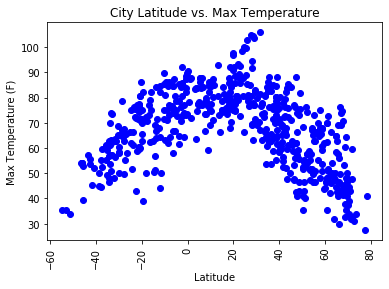

In [16]:
plt.scatter(Weather_df["Latitude"], Weather_df["Temperature"], color = "blue")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xticks(rotation='vertical')

plt.savefig("Lat_Temp.png")

plt.show()

## Latitude vs. Humidity Plot

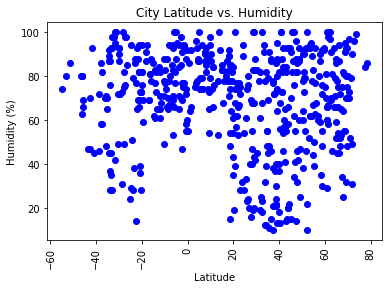

In [17]:
plt.scatter(Weather_df["Latitude"], Weather_df["Humidity"], color = "blue")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xticks(rotation='vertical')

plt.savefig("Lat_Hum.png")

plt.show()

## Latitude vs. Cloudiness Plot

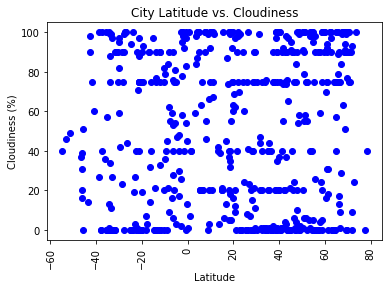

In [18]:
#from datetime import date
#date.today()

#fix cloudiness otherwise same as others

plt.scatter(Weather_df["Latitude"], Weather_df["Cloudiness"], color = "blue")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xticks(rotation='vertical')

plt.savefig("Lat_Cloud.png")

plt.show()

## Latitude vs. Wind Speed Plot

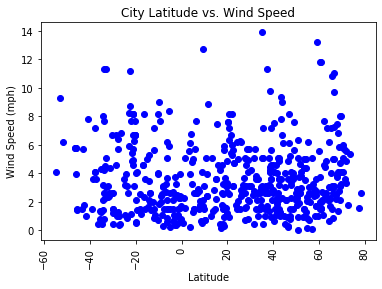

In [19]:
plt.scatter(Weather_df["Latitude"], Weather_df["Wind Speed"], color = "blue")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xticks(rotation='vertical')

plt.savefig("Lat_WS.png")

plt.show()

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots

In [21]:
# Create Northern and Southern Hemisphere DataFrames
# South, lat < 0; North lat > 0

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# #print(slope)

# #slope = int(slope)
# #print(slope)
# #print(x_values.type())

# #Work around for TypeError: can't multiply sequence by non-int of type 'numpy.float64'

# x_values2 = []
# for x in x_values:
#     x_values2.append(x*slope)   
# #print(x_values2)

# regress_values = x_values2 + intercept

# print(f"The r value is: {rvalue}")
# print(f"The r squared value is: {rvalue**2}")

# # ### FIGURE C ### #
# line_eq = "y = " + str(round(slope, 2)) + " x + " + str(round(intercept, 2))
# plt.scatter(x_values, y_values)
# plt.plot(x_values, regress_values, "r-")
# plt.annotate(line_eq, (20,36), fontsize=15, color = "red")
# plt.title("Capomulin")
# plt.xlabel("Weight (g)")
# plt.ylabel("Average Tumor Volume (mm3)")
# plt.show()

In [24]:
Weather_df_N = Weather_df.loc[Weather_df["Latitude"] >= 0]
Weather_df_S = Weather_df.loc[Weather_df["Latitude"] < 0]

Weather_df_S


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
1,cape town,-33.93,18.42,57.25,87,75,11.30
6,punta arenas,-53.15,-70.92,35.29,80,46,9.30
12,constitucion,-35.33,-72.42,49.12,65,0,1.28
16,avarua,-21.21,-159.78,77.00,69,97,5.70
17,port elizabeth,-33.92,25.57,53.60,76,34,2.60
...,...,...,...,...,...,...,...
525,sunbury,-37.58,144.73,59.79,58,40,3.60
527,mpwapwa,-6.35,36.48,57.90,94,53,1.47
528,benguela,-12.58,13.41,67.77,84,0,1.99
531,yantzaza,-3.83,-78.76,64.63,84,48,0.67


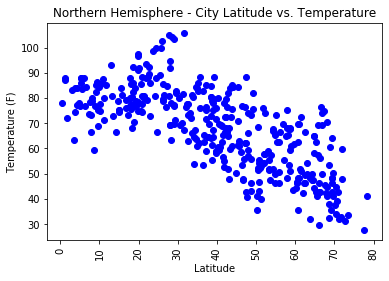

In [26]:
plt.scatter(Weather_df_N["Latitude"], Weather_df_N["Temperature"], color = "blue")

plt.title("Northern Hemisphere - City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xticks(rotation='vertical')

plt.savefig("Lat_Temp_N.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

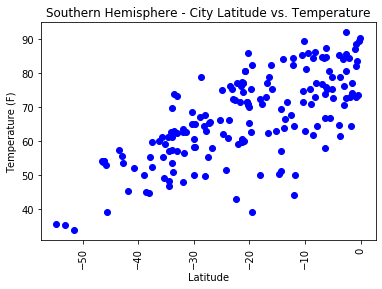

In [28]:
plt.scatter(Weather_df_S["Latitude"], Weather_df_S["Temperature"], color = "blue")

plt.title("Southern Hemisphere - City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xticks(rotation='vertical')

plt.savefig("Lat_Temp_S.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

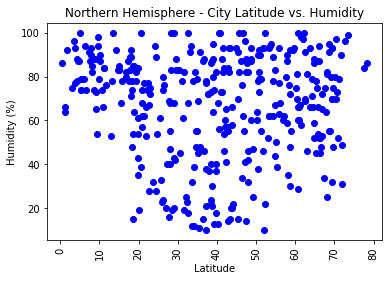

In [29]:
plt.scatter(Weather_df_N["Latitude"], Weather_df_N["Humidity"], color = "blue")

plt.title("Northern Hemisphere - City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xticks(rotation='vertical')

plt.savefig("Lat_Hum_N.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

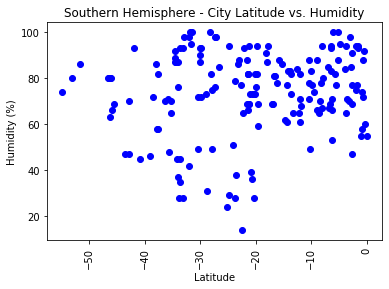

In [30]:
plt.scatter(Weather_df_S["Latitude"], Weather_df_S["Humidity"], color = "blue")

plt.title("Southern Hemisphere - City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xticks(rotation='vertical')

plt.savefig("Lat_Hum_S.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

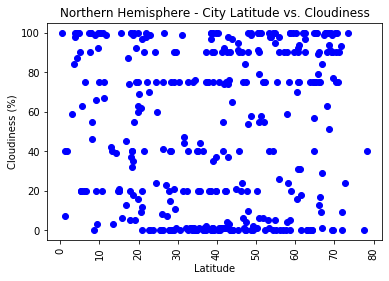

In [31]:
plt.scatter(Weather_df_N["Latitude"], Weather_df_N["Cloudiness"], color = "blue")

plt.title("Northern Hemisphere - City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xticks(rotation='vertical')

plt.savefig("Lat_Cloud_N.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

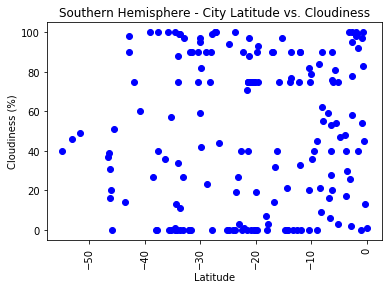

In [32]:
plt.scatter(Weather_df_S["Latitude"], Weather_df_S["Cloudiness"], color = "blue")

plt.title("Southern Hemisphere - City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xticks(rotation='vertical')

plt.savefig("Lat_Cloud_S.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

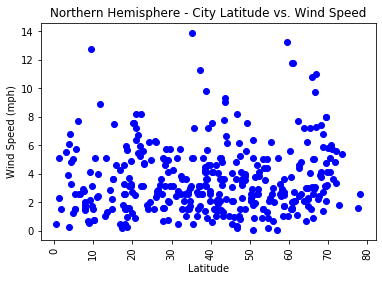

In [33]:
plt.scatter(Weather_df_N["Latitude"], Weather_df_N["Wind Speed"], color = "blue")

plt.title("Northern Hemisphere - City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xticks(rotation='vertical')

plt.savefig("Lat_WS_N.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

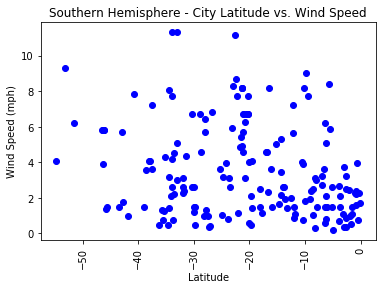

In [34]:
plt.scatter(Weather_df_S["Latitude"], Weather_df_S["Wind Speed"], color = "blue")

plt.title("Southern Hemisphere - City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xticks(rotation='vertical')

plt.savefig("Lat_WS_S.png")

plt.show()

In [ ]:
#Notes
# url = "http://api.openweathermap.org/data/2.5/weather?"
# x="rikitea"

# query_url = url + "appid=" + weather_api_key + "&q=" + x
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
# weather_json

# #if weather_json != "":
# #    print("stuff here")

# if weather_json["cod"] != "404":
#     print("stuff here")
    
# if weather_json["cod"] == "404":
#     print("404")

# weather_json["clouds"]["all"]

# #["wind"]["speed"]["all"]
    

# weather_json[""]

#     Humidity.append(weather_json["main"]["humidity"])
#     preround = ((weather_json["main"]["temp"]) - 273.15)*(9/5)+32
#     preround = round(preround,2)
#     Temperature.append(preround)
#     Latitude.append(weather_json["coord"]["lat"])
#     Longitude.append(weather_json["coord"]["lon"])
#     Cloudiness.append(weather_json["clouds"])
#     WindSpeed.append(weather_json["wind"]["speed"])